In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### TEMPLATE MATCHING


Template matching is a technique that involves searching for a template image within a larger image.

The goal is to identify areas of the larger image that match or closely resemble the template image.

Template matching methods in openCV are basically some sort of correlation based metrics.

In [2]:
full = cv2.imread('Imagess/full.jpeg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

In [3]:
football= cv2.imread('Imagess/football.png')
football = cv2.cvtColor(football, cv2.COLOR_BGR2RGB)

#### eval()
The **eval()** function in Python evaluates a string and returns the result. The string can be a Python expression, statement, or function.

In [4]:
#List of the methods in OpenCV to use for template matching:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

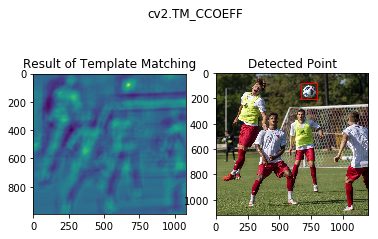

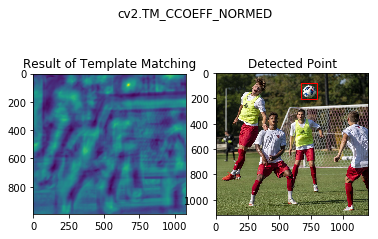

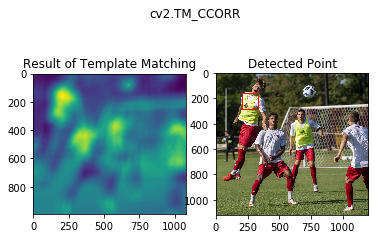

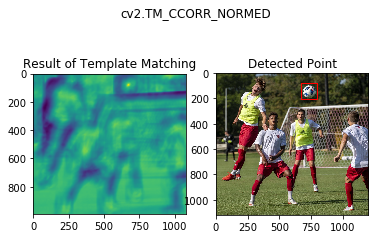

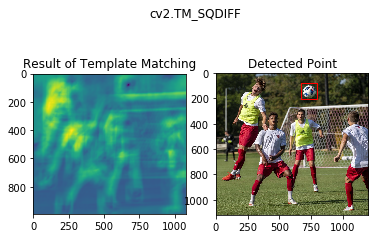

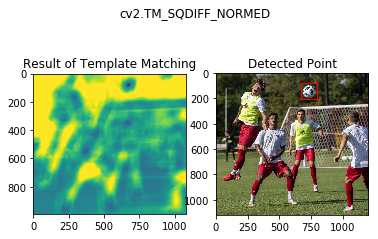

In [5]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,football,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images...
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    height,width,channels = football.shape
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    